In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
chunks = {"time": 24}

original = xr.open_dataset("/g/data/xv83/users/bxn599/wbgt/ERA5/wbgt_AUS-10i_ERA5_evaluation_r1i1p1f1_CSIRO_CCAM-v2203-SN_v1-r1_1hr_198001010000-198012312300.nc", chunks=chunks)
lon_shif = xr.open_dataset("/scratch/e53/bxn599/aus10i/old/ERA5_evaluation.old/wbgt_AUS-10i_ERA5_evaluation_r1i1p1f1_CSIRO_CCAM-v2203-SN_v1-r1_1hr_198001010000-198012312300_lon_shifted_000001.nc", chunks=chunks)
smal_neg = xr.open_dataset("/scratch/e53/bxn599/aus10i/old/ERA5_evaluation.old/wbgt_AUS-10i_ERA5_evaluation_r1i1p1f1_CSIRO_CCAM-v2203-SN_v1-r1_1hr_198001010000-198012312300_cza_set_small_neg.nc", chunks=chunks)
mins_one = xr.open_dataset("/scratch/e53/bxn599/aus10i/old/ERA5_evaluation.old/wbgt_AUS-10i_ERA5_evaluation_r1i1p1f1_CSIRO_CCAM-v2203-SN_v1-r1_1hr_198001010000-198012312300_cza_set_-1.nc", chunks=chunks)

/g/data/xp65/public/apps/med_conda/envs/analysis3-25.10/lib/python3.11/site-packages/distributed/diagnostics/nvml.py:14: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml


In [3]:
wbgt_original = original['wbgt']
wbgt_lon_shif = lon_shif['wbgt']
wbgt_smal_neg = smal_neg['wbgt']
wbgt_mins_one = mins_one['wbgt']

wbgt_original = wbgt_original.assign_coords(lon=wbgt_original.lon.round(2))
wbgt_original = wbgt_original.assign_coords(lat=wbgt_original.lat.round(2))
wbgt_lon_shif = wbgt_lon_shif.assign_coords(lon=wbgt_original.lon.round(2))
wbgt_lon_shif = wbgt_lon_shif.assign_coords(lat=wbgt_original.lat.round(2))
wbgt_smal_neg = wbgt_smal_neg.assign_coords(lon=wbgt_original.lon.round(2))
wbgt_smal_neg = wbgt_smal_neg.assign_coords(lat=wbgt_original.lat.round(2))
wbgt_mins_one = wbgt_mins_one.assign_coords(lon=wbgt_original.lon.round(2))
wbgt_mins_one = wbgt_mins_one.assign_coords(lat=wbgt_original.lat.round(2))

In [4]:
print(wbgt_original)
print(wbgt_lon_shif)
print(wbgt_smal_neg)
print(wbgt_mins_one)

<xarray.DataArray 'wbgt' (time: 8784, lat: 612, lon: 929)> Size: 20GB
dask.array<open_dataset-wbgt, shape=(8784, 612, 929), dtype=float32, chunksize=(24, 612, 929), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 70kB 1980-01-01 ... 1980-12-31T23:00:00
  * lat      (lat) float64 5kB -52.4 -52.3 -52.2 -52.1 -52.0 ... 8.4 8.5 8.6 8.7
  * lon      (lon) float64 7kB 89.2 89.3 89.4 89.5 ... 181.7 181.8 181.9 182.0
Attributes:
    long_name:  Wet Bulb Globe Temperature
    units:      degK
<xarray.DataArray 'wbgt' (time: 8784, lat: 612, lon: 929)> Size: 20GB
dask.array<open_dataset-wbgt, shape=(8784, 612, 929), dtype=float32, chunksize=(24, 612, 929), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 70kB 1980-01-01 ... 1980-12-31T23:00:00
  * lat      (lat) float64 5kB -52.4 -52.3 -52.2 -52.1 -52.0 ... 8.4 8.5 8.6 8.7
  * lon      (lon) float64 7kB 89.2 89.3 89.4 89.5 ... 181.7 181.8 181.9 182.0
Attributes:
    long_name:  Wet Bulb Globe Tempe

In [5]:
diff_lon_shif = wbgt_lon_shif - wbgt_original
diff_smal_neg = wbgt_smal_neg - wbgt_original
diff_mins_one = wbgt_mins_one - wbgt_original
diff = wbgt_smal_neg - wbgt_lon_shif
diff_mins_one_small_neg = wbgt_mins_one - wbgt_smal_neg

## Difference at 20-NOV-1980 21:00, 129.9E, 15.3S
Lon shifted 0.00001 and CZDA changed to -1e-6 show the same difference

In [6]:
print(diff_lon_shif[7797,371,407].values)
print(diff_smal_neg[7797,371,407].values)
print(diff_mins_one[7797,371,407].values)

2.1047363
2.1047363
2.1047363


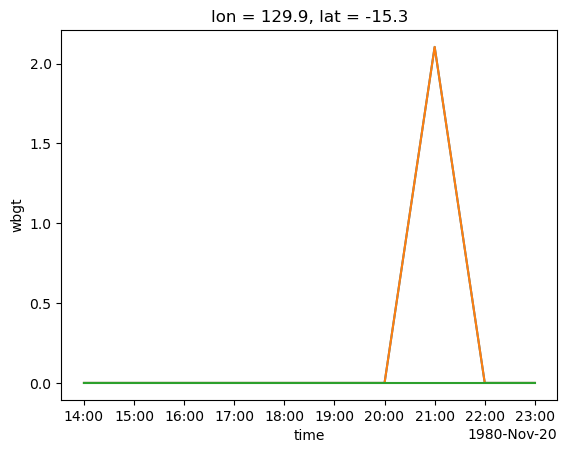

In [7]:
diff_lon_shif[7790:7800,371,407].plot()
diff_smal_neg[7790:7800,371,407].plot()
diff[7790:7800,371,407].plot()

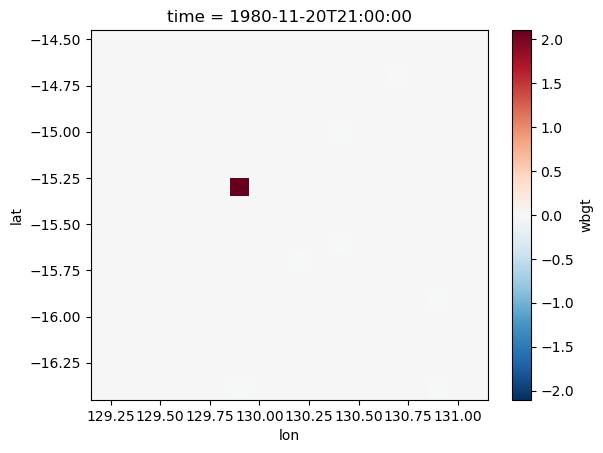

In [8]:
diff_lon_shif[7797,360:380,400:420].plot()

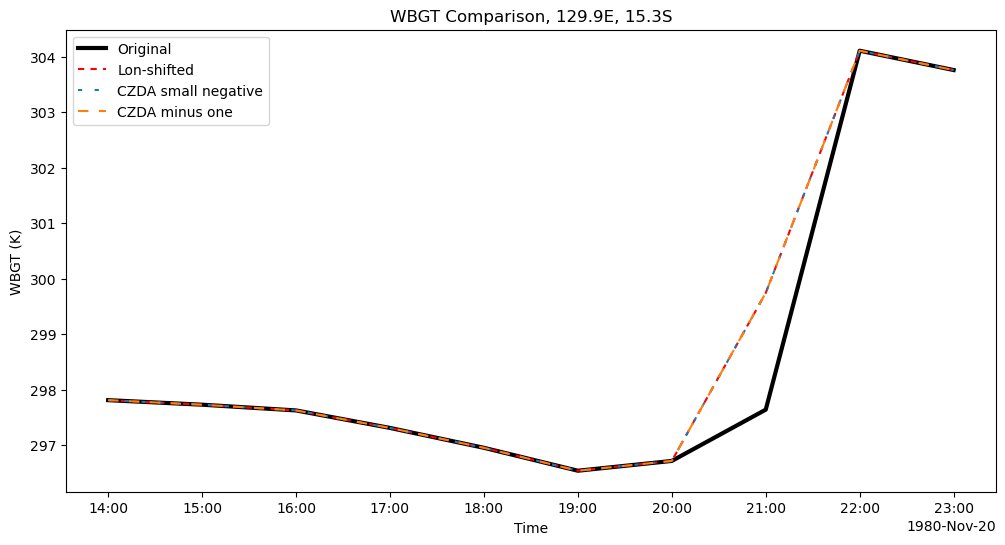

In [9]:
# Create figure and axis
plt.figure(figsize=(12, 6))

# Plot original
wbgt_original[7790:7800, 371, 407].plot(
    label='Original',
    color="black",
    linewidth=3
)

# Plot lon-shifted on same axis
wbgt_lon_shif[7790:7800, 371, 407].plot(
    dashes=[3, 3],
    label='Lon-shifted',
    color="red"
)

# Plot small neg on same axis
wbgt_smal_neg[7790:7800, 371, 407].plot(
    dashes=[2, 6],
    label='CZDA small negative'
)

# Plot minus one on same axis
wbgt_mins_one[7790:7800, 371, 407].plot(
    dashes=[5, 5],
    label='CZDA minus one'
)
# Add legend
plt.legend()

# Add title and labels
plt.title('WBGT Comparison, 129.9E, 15.3S')
plt.xlabel('Time')
plt.ylabel('WBGT (K)')

plt.show()

## Compare lon shifted and czda small negative at 26-OCT-1980 20:00, 138.6E, 43.3S
Show that the datasets are not entirely the same

In [10]:
print(diff[7196,91,494].values)

-1.411499


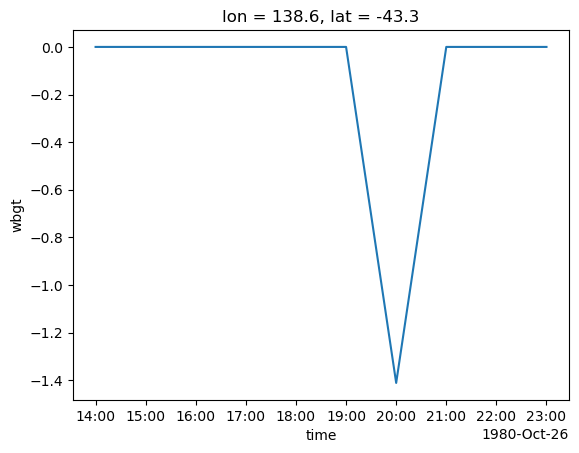

In [11]:
diff[7190:7200,91,494].plot()

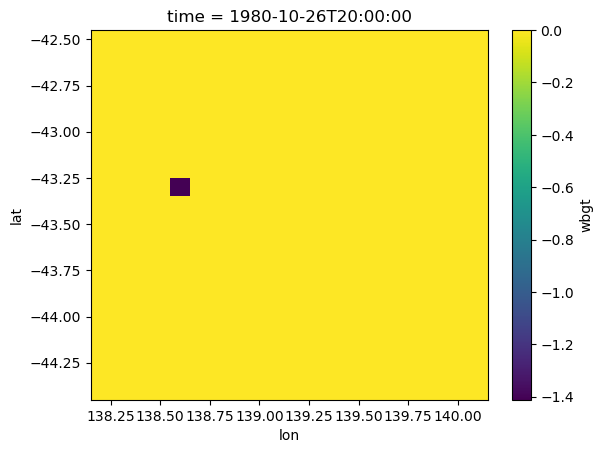

In [12]:
diff[7196,80:100,490:510].plot()

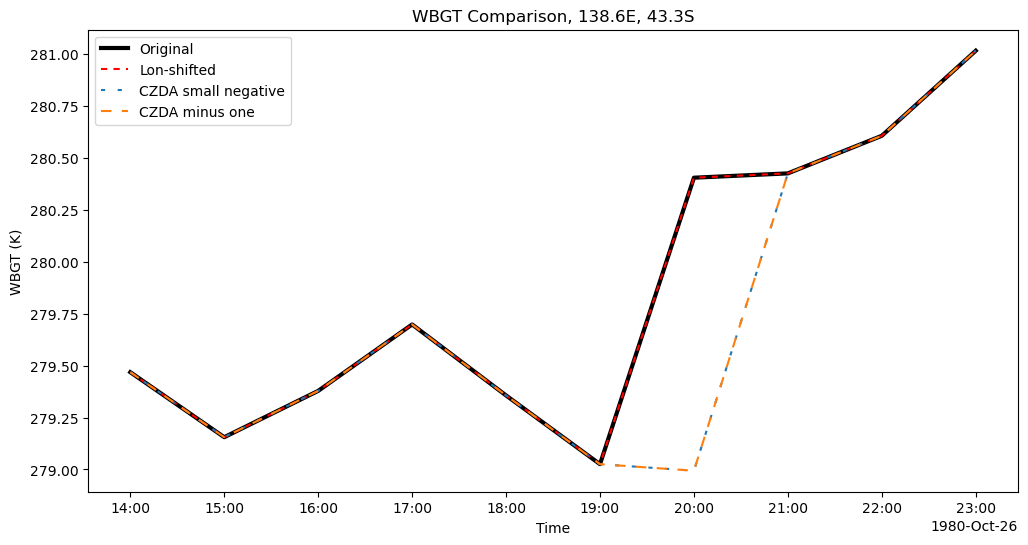

In [13]:
# Create figure and axis
plt.figure(figsize=(12, 6))

# Plot original
wbgt_original[7190:7200, 91, 494].plot(
    label='Original',
    color="black",
    linewidth=3
)

# Plot lon-shifted on same axis
wbgt_lon_shif[7190:7200, 91, 494].plot(
    dashes=[3, 3],
    label='Lon-shifted',
    color="red"
)

# Plot small neg on same axis
wbgt_smal_neg[7190:7200, 91, 494].plot(
    dashes=[2, 6],
    label='CZDA small negative'
)

# Plot minus one on same axis
wbgt_mins_one[7190:7200, 91, 494].plot(
    dashes=[5, 5],
    label='CZDA minus one'
)
# Add legend
plt.legend()

# Add title and labels
plt.title('WBGT Comparison, 138.6E, 43.3S')
plt.xlabel('Time')
plt.ylabel('WBGT (K)')

plt.show()

Note that here, original and lon-shifted match

## Compare lon shifted and czda small negative at 11-OCT-1980 09:00, 137.9E, 11S

In [14]:
print(diff[7545,414,487].values)

0.55026245


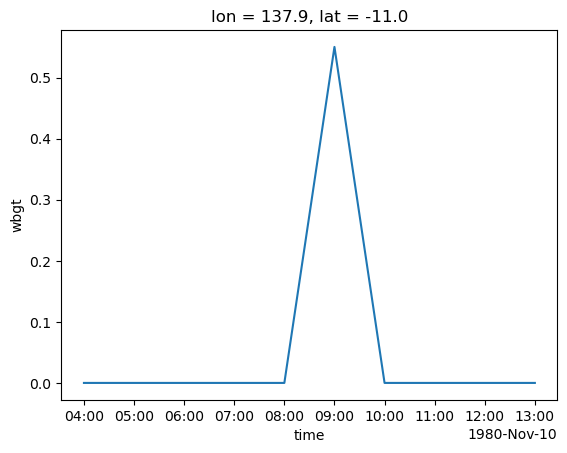

In [15]:
diff[7540:7550,414,487].plot()

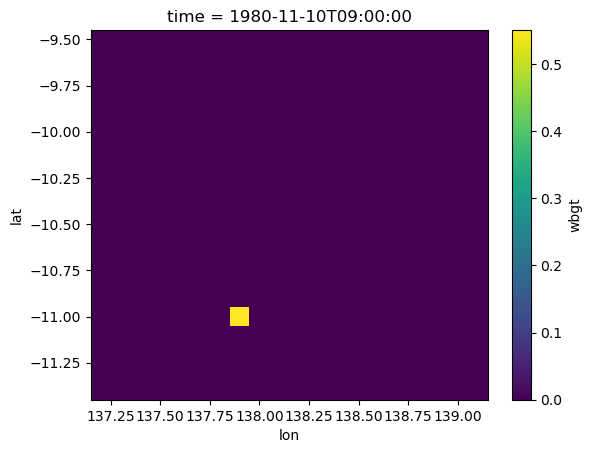

In [16]:
diff[7545,410:430,480:500].plot()

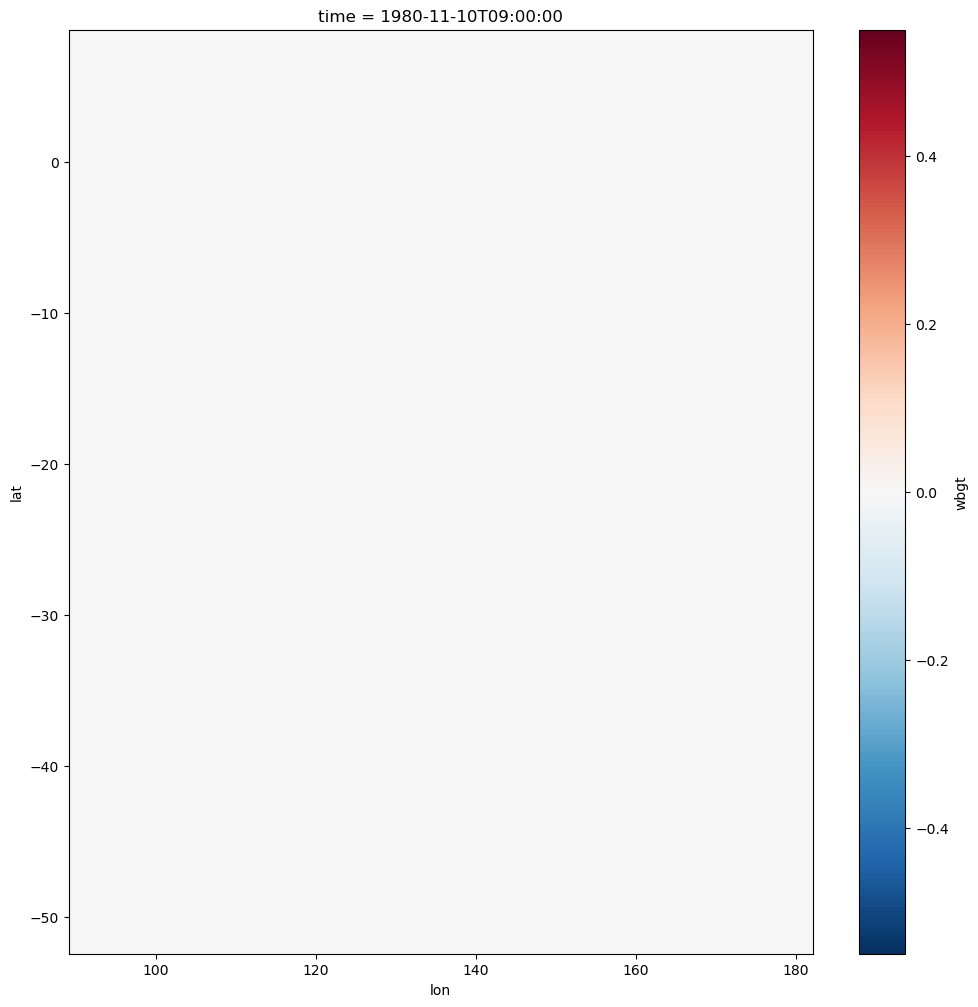

In [27]:
plt.figure(figsize=(12, 12))
diff[7545,:,:].plot()

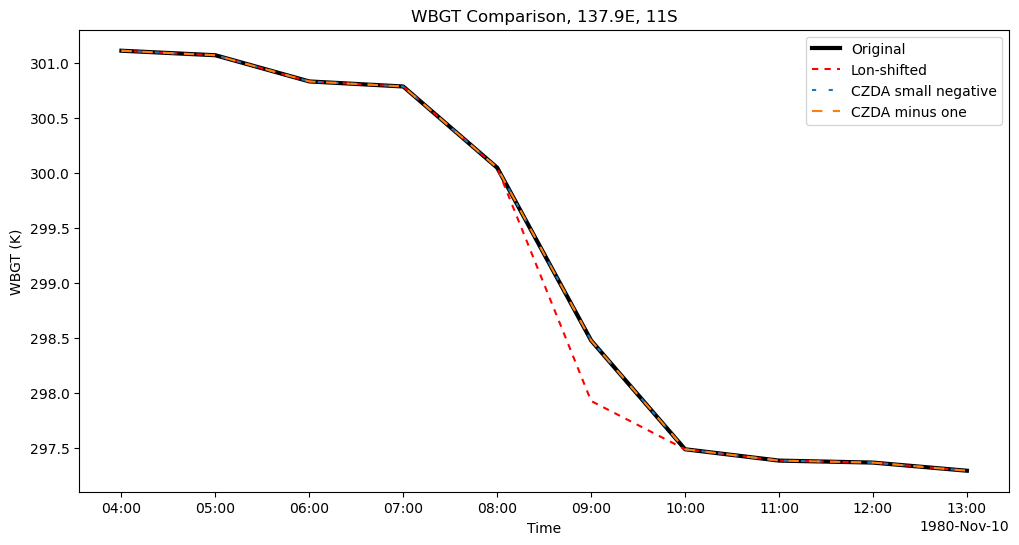

In [18]:
# Create figure and axis
plt.figure(figsize=(12, 6))

# Plot original
wbgt_original[7540:7550,414,487].plot(
    label='Original',
    color="black",
    linewidth=3
)

# Plot lon-shifted on same axis
wbgt_lon_shif[7540:7550,414,487].plot(
    dashes=[3, 3],
    label='Lon-shifted',
    color="red"
)

# Plot small neg on same axis
wbgt_smal_neg[7540:7550,414,487].plot(
    dashes=[2, 6],
    label='CZDA small negative'
)

# Plot minus one on same axis
wbgt_mins_one[7540:7550,414,487].plot(
    dashes=[5, 5],
    label='CZDA minus one'
)
# Add legend
plt.legend()

# Add title and labels
plt.title('WBGT Comparison, 137.9E, 11S')
plt.xlabel('Time')
plt.ylabel('WBGT (K)')

plt.show()

Note that here, original and CZDA match

In [19]:
da = diff_lon_shif

# 1. max over space for each time step
spatial_max = da.max(dim=("lat", "lon"))

# 2. time index where global max occurs
itime = spatial_max.argmax().compute().item()

# 3. extract that time slice and find lat/lon index
slice2d = da.isel(time=itime)

flat_index = slice2d.argmax().compute().item()
nlon = da.sizes["lon"]

ilat = flat_index // nlon
ilon = flat_index %  nlon

# 4. coordinate values
max_val = spatial_max[itime].compute().item()
max_time = da.time.values[itime]
max_lat  = da.lat.values[ilat]
max_lon  = da.lon.values[ilon]

# 1. max over space for each time step
spatial_min = da.min(dim=("lat", "lon"))

# 2. time index where global max occurs
itime = spatial_min.argmin().compute().item()

# 3. extract that time slice and find lat/lon index
slice2d = da.isel(time=itime)

flat_index = slice2d.argmin().compute().item()
nlon = da.sizes["lon"]

ilat = flat_index // nlon
ilon = flat_index %  nlon

# 4. coordinate values
min_val = spatial_min[itime].compute().item()
min_time = da.time.values[itime]
min_lat  = da.lat.values[ilat]
min_lon  = da.lon.values[ilon]

print("MIN VALUE:", min_val)
print("TIME:", min_time)
print("LAT:", min_lat)
print("LON:", min_lon)

print("MAX VALUE:", max_val)
print("TIME:", max_time)
print("LAT:", max_lat)
print("LON:", max_lon)

MIN VALUE: -1.425018310546875
TIME: 1980-02-22T09:00:00.000000000
LAT: -38.3
LON: 142.7
MAX VALUE: 2.104736328125
TIME: 1980-11-20T21:00:00.000000000
LAT: -15.3
LON: 129.9


In [20]:
da = diff_smal_neg

# 1. max over space for each time step
spatial_max = da.max(dim=("lat", "lon"))

# 2. time index where global max occurs
itime = spatial_max.argmax().compute().item()

# 3. extract that time slice and find lat/lon index
slice2d = da.isel(time=itime)

flat_index = slice2d.argmax().compute().item()
nlon = da.sizes["lon"]

ilat = flat_index // nlon
ilon = flat_index %  nlon

# 4. coordinate values
max_val = spatial_max[itime].compute().item()
max_time = da.time.values[itime]
max_lat  = da.lat.values[ilat]
max_lon  = da.lon.values[ilon]

# 1. max over space for each time step
spatial_min = da.min(dim=("lat", "lon"))

# 2. time index where global max occurs
itime = spatial_min.argmin().compute().item()

# 3. extract that time slice and find lat/lon index
slice2d = da.isel(time=itime)

flat_index = slice2d.argmin().compute().item()
nlon = da.sizes["lon"]

ilat = flat_index // nlon
ilon = flat_index %  nlon

# 4. coordinate values
min_val = spatial_min[itime].compute().item()
min_time = da.time.values[itime]
min_lat  = da.lat.values[ilat]
min_lon  = da.lon.values[ilon]

print("MIN VALUE:", min_val)
print("TIME:", min_time)
print("LAT:", min_lat)
print("LON:", min_lon)

print("MAX VALUE:", max_val)
print("TIME:", max_time)
print("LAT:", max_lat)
print("LON:", max_lon)

MIN VALUE: -1.425018310546875
TIME: 1980-02-22T09:00:00.000000000
LAT: -38.3
LON: 142.7
MAX VALUE: 2.104736328125
TIME: 1980-11-20T21:00:00.000000000
LAT: -15.3
LON: 129.9


In [21]:
da = diff_mins_one

# 1. max over space for each time step
spatial_max = da.max(dim=("lat", "lon"))

# 2. time index where global max occurs
itime = spatial_max.argmax().compute().item()

# 3. extract that time slice and find lat/lon index
slice2d = da.isel(time=itime)

flat_index = slice2d.argmax().compute().item()
nlon = da.sizes["lon"]

ilat = flat_index // nlon
ilon = flat_index %  nlon

# 4. coordinate values
max_val = spatial_max[itime].compute().item()
max_time = da.time.values[itime]
max_lat  = da.lat.values[ilat]
max_lon  = da.lon.values[ilon]

# 1. max over space for each time step
spatial_min = da.min(dim=("lat", "lon"))

# 2. time index where global max occurs
itime = spatial_min.argmin().compute().item()

# 3. extract that time slice and find lat/lon index
slice2d = da.isel(time=itime)

flat_index = slice2d.argmin().compute().item()
nlon = da.sizes["lon"]

ilat = flat_index // nlon
ilon = flat_index %  nlon

# 4. coordinate values
min_val = spatial_min[itime].compute().item()
min_time = da.time.values[itime]
min_lat  = da.lat.values[ilat]
min_lon  = da.lon.values[ilon]

print("MIN VALUE:", min_val)
print("TIME:", min_time)
print("LAT:", min_lat)
print("LON:", min_lon)

print("MAX VALUE:", max_val)
print("TIME:", max_time)
print("LAT:", max_lat)
print("LON:", max_lon)

MIN VALUE: -1.425018310546875
TIME: 1980-02-22T09:00:00.000000000
LAT: -38.3
LON: 142.7
MAX VALUE: 2.104736328125
TIME: 1980-11-20T21:00:00.000000000
LAT: -15.3
LON: 129.9


In [22]:
da = diff

# 1. max over space for each time step
spatial_max = da.max(dim=("lat", "lon"))

# 2. time index where global max occurs
itime = spatial_max.argmax().compute().item()

# 3. extract that time slice and find lat/lon index
slice2d = da.isel(time=itime)

flat_index = slice2d.argmax().compute().item()
nlon = da.sizes["lon"]

ilat = flat_index // nlon
ilon = flat_index %  nlon

# 4. coordinate values
max_val = spatial_max[itime].compute().item()
max_time = da.time.values[itime]
max_lat  = da.lat.values[ilat]
max_lon  = da.lon.values[ilon]

# 1. max over space for each time step
spatial_min = da.min(dim=("lat", "lon"))

# 2. time index where global max occurs
itime = spatial_min.argmin().compute().item()

# 3. extract that time slice and find lat/lon index
slice2d = da.isel(time=itime)

flat_index = slice2d.argmin().compute().item()
nlon = da.sizes["lon"]

ilat = flat_index // nlon
ilon = flat_index %  nlon

# 4. coordinate values
min_val = spatial_min[itime].compute().item()
min_time = da.time.values[itime]
min_lat  = da.lat.values[ilat]
min_lon  = da.lon.values[ilon]

print("MIN VALUE:", min_val)
print("TIME:", min_time)
print("LAT:", min_lat)
print("LON:", min_lon)

print("MAX VALUE:", max_val)
print("TIME:", max_time)
print("LAT:", max_lat)
print("LON:", max_lon)

MIN VALUE: -1.4114990234375
TIME: 1980-10-26T20:00:00.000000000
LAT: -43.3
LON: 138.6
MAX VALUE: 0.550262451171875
TIME: 1980-11-10T09:00:00.000000000
LAT: -11.0
LON: 137.9


In [23]:
da = diff_mins_one_small_neg

# 1. max over space for each time step
spatial_max = da.max(dim=("lat", "lon"))

# 2. time index where global max occurs
itime = spatial_max.argmax().compute().item()

# 3. extract that time slice and find lat/lon index
slice2d = da.isel(time=itime)

flat_index = slice2d.argmax().compute().item()
nlon = da.sizes["lon"]

ilat = flat_index // nlon
ilon = flat_index %  nlon

# 4. coordinate values
max_val = spatial_max[itime].compute().item()
max_time = da.time.values[itime]
max_lat  = da.lat.values[ilat]
max_lon  = da.lon.values[ilon]

# 1. max over space for each time step
spatial_min = da.min(dim=("lat", "lon"))

# 2. time index where global max occurs
itime = spatial_min.argmin().compute().item()

# 3. extract that time slice and find lat/lon index
slice2d = da.isel(time=itime)

flat_index = slice2d.argmin().compute().item()
nlon = da.sizes["lon"]

ilat = flat_index // nlon
ilon = flat_index %  nlon

# 4. coordinate values
min_val = spatial_min[itime].compute().item()
min_time = da.time.values[itime]
min_lat  = da.lat.values[ilat]
min_lon  = da.lon.values[ilon]

print("MIN VALUE:", min_val)
print("TIME:", min_time)
print("LAT:", min_lat)
print("LON:", min_lon)

print("MAX VALUE:", max_val)
print("TIME:", max_time)
print("LAT:", max_lat)
print("LON:", max_lon)

MIN VALUE: 0.0
TIME: 1980-01-01T00:00:00.000000000
LAT: -52.4
LON: 89.2
MAX VALUE: 0.0
TIME: 1980-01-01T00:00:00.000000000
LAT: -52.4
LON: 89.2


In [24]:
# diff_lon_shif = wbgt_lon_shif - wbgt_original
# diff_smal_neg = wbgt_smal_neg - wbgt_original
# diff_mins_one = wbgt_mins_one - wbgt_original
# diff = wbgt_smal_neg - wbgt_lon_shif
# diff_mins_one_small_neg = wbgt_mins_one - wbgt_smal_neg

In [25]:
print(wbgt_smal_neg.isel(time=10).sel(lat=0, lon=127.5).values)
print(wbgt_mins_one.isel(time=10).sel(lat=0, lon=127.5).values)
print(wbgt_original.isel(time=10).sel(lat=0, lon=127.5).values)
print(wbgt_lon_shif.isel(time=10).sel(lat=0, lon=127.5).values)

nan
nan
nan
298.8126
